In [49]:
import pandas as pd
import numpy as np



In [50]:
ABdf = pd.read_csv("D:\self learning\A\marketing_AB.csv")
ABdf.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


Summary :
This dataset has 7 column which are Unnamed:0, used id, test group, converted, total ads, most ads day, most ads hour. 
Unnamed:0: Row index
User ID: Unique identifier for each user
Test Group: Indicates whether the user saw the advertisement ("ad") or the public service announcement ("psa")
Converted: Indicates whether the user purchased the product (True) or not (False)
Total Ads: The number of ads viewed by the user
Most Ads Day: The day when the user viewed the most ads
Most Ads Hour: The hour of the day when the user viewed the most ads

In [51]:
ABdf.info

<bound method DataFrame.info of         Unnamed: 0  user id test group  converted  total ads most ads day  \
0                0  1069124         ad      False        130       Monday   
1                1  1119715         ad      False         93      Tuesday   
2                2  1144181         ad      False         21      Tuesday   
3                3  1435133         ad      False        355      Tuesday   
4                4  1015700         ad      False        276       Friday   
...            ...      ...        ...        ...        ...          ...   
588096      588096  1278437         ad      False          1      Tuesday   
588097      588097  1327975         ad      False          1      Tuesday   
588098      588098  1038442         ad      False          3      Tuesday   
588099      588099  1496395         ad      False          1      Tuesday   
588100      588100  1237779         ad      False          1      Tuesday   

        most ads hour  
0                  

In [52]:
ABdf['user id'].duplicated().sum()

0

In [53]:
ABdf.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [54]:

newABdf = ABdf.drop(columns=['Unnamed: 0', 'user id'])
newABdf

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


Summary:
Since the column Unnamed:0 and used id is unnecessary for AB testing analysis so the column Unnamed:0 and used id will be deleted

In [55]:
print("Test group: ", newABdf['test group'].unique())
print("Number of unique values in 'test group':", len(newABdf['test group'].unique()))

print("Converted: ", newABdf['converted'].unique())
print("Number of unique values in 'converted':", len(newABdf['converted'].unique()))

print("Total ads: ", newABdf['total ads'].unique())
print("Number of unique values in 'total ads':", len(newABdf['total ads'].unique()))

print("Most ads day: ", newABdf['most ads day'].unique())
print("Number of unique values in 'most ads day':", len(newABdf['most ads day'].unique()))

print("Most ads hour: ", newABdf['most ads hour'].unique())
print("Number of unique values in 'most ads hour':", len(newABdf['most ads hour'].unique()))


Test group:  ['ad' 'psa']
Number of unique values in 'test group': 2
Converted:  [False  True]
Number of unique values in 'converted': 2
Total ads:  [ 130   93   21  355  276  734  264   17  142  209   47   61   40   20
    9   64   26  248   73  281  389  136   87   46    3  114  175  119
  313   89  364   24  112   49   27  274   45  177   90  265   71   31
  588   56  108  103  239   63   66  111   74   14  258 1057  137  131
  124   13   37  738  199  211   98   19  127   18  126  197   77   60
   95   97   22  117   41   57  593   28   85   53   43  133   33 1328
    7    6   62  247  464   99  233  139  407  323   76  395  166   34
  246  653  122   32  386   44  138  109   39  159   30   59  421  446
  555  105  128  310  163   10  290  164   79  312   16  161  505  640
  118  266  456   80  100  983   36    1    5  463  720   52  442  334
 1056  270  240  194  271  489  115  180  241   15  154  120   29  107
  176    8  146  121   50   69  297   35   78  170  214   81    2   38

In [56]:
# Generate statistical summary for numerical columns
stat_summary = newABdf.describe()

# Display the result
print(stat_summary)


           total ads  most ads hour
count  588101.000000  588101.000000
mean       24.820876      14.469061
std        43.715181       4.834634
min         1.000000       0.000000
25%         4.000000      11.000000
50%        13.000000      14.000000
75%        27.000000      18.000000
max      2065.000000      23.000000


Univariate Analysis

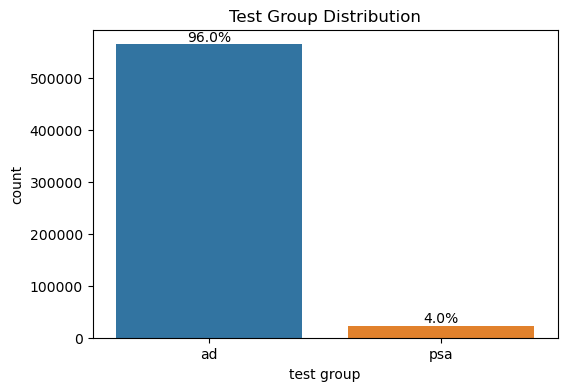

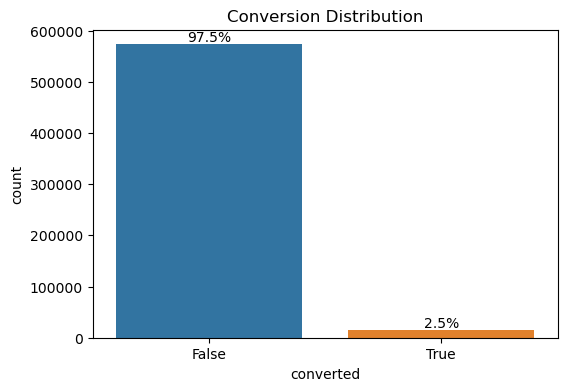

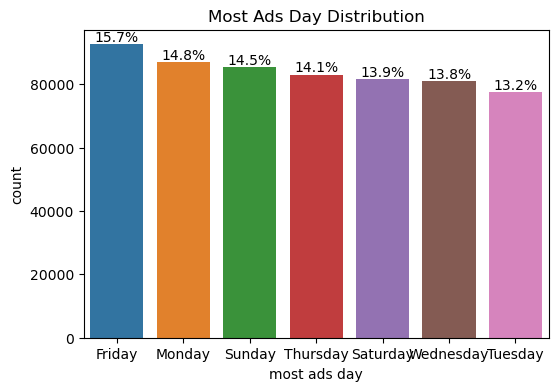

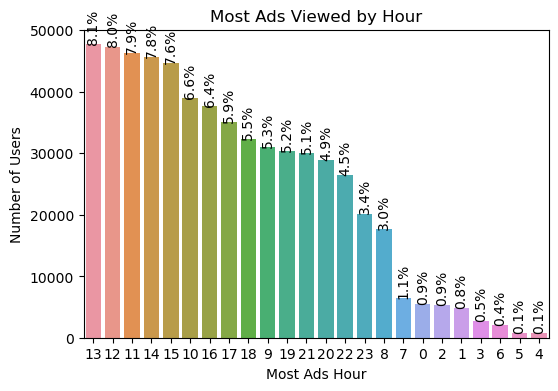

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns



# Function to add value labels with percentages to bar plots
def add_value_labels_with_percent(ax, total, rotate_percentages=False):
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', rotation=90 if rotate_percentages else 0)

# Plot 1: Test Group (categorical)
plt.figure(figsize=(6, 4))
test_group_counts = newABdf['test group'].value_counts()
ax1 = sns.countplot(data=newABdf, x='test group', order=test_group_counts.index)
ax1.set_title('Test Group Distribution')
add_value_labels_with_percent(ax1, test_group_counts.sum())
plt.show()

# Plot 2: Converted (categorical)
plt.figure(figsize=(6, 4))
converted_counts = newABdf['converted'].value_counts()
ax2 = sns.countplot(data=newABdf, x='converted', order=converted_counts.index)
ax2.set_title('Conversion Distribution')
add_value_labels_with_percent(ax2, converted_counts.sum())
plt.show()

# Plot 3: Most Ads Day (categorical)
plt.figure(figsize=(6, 4))
most_ads_day_counts = newABdf['most ads day'].value_counts()
ax3 = sns.countplot(data=newABdf, x='most ads day', order=most_ads_day_counts.index)
ax3.set_title('Most Ads Day Distribution')
add_value_labels_with_percent(ax3, most_ads_day_counts.sum())
plt.show()

# Plot 4: Most Ads Hour (categorical)
plt.figure(figsize=(6, 4))
most_ads_hour_counts = newABdf['most ads hour'].value_counts()
ax4 = sns.countplot(data=newABdf, x='most ads hour', order=most_ads_hour_counts.index)
ax4.set_title('Most Ads Viewed by Hour')
ax4.set_xlabel('Most Ads Hour')
ax4.set_ylabel('Number of Users')
add_value_labels_with_percent(ax4, most_ads_hour_counts.sum(), rotate_percentages=True)

plt.show()



Summary:
1. Test Group Distribution
This bar chart shows the distribution of users in the test groups, where 96% of the users were exposed to the ad campaign and 4% to the PSA. This skewed distribution indicates that most users were shown advertisements rather than the PSA, which could affect the statistical power of the test. With such an imbalance, the conclusions drawn about the impact of ads may not be as reliable.

2. Conversion Distribution
This chart highlights that 97.5% of users did not convert which is users that didn't buy the product while users that buy only 2.5%. The low conversion rate actually is common in many marketing campaigns. Normally conversion rate above 10% can be consider as good value while the average conversion rate is between 2 and 5 percent for all advertisers from brand names to small-to-midsized businesses (SMBs). https://www.webfx.com/blog/marketing/what-is-a-good-conversion-rate/

3. Most Ads Day
The third plot shows the distribution of ad views across the days of the week, with Friday (15.7%) having the highest percentage and Tuesday (13.2%) the lowest. This suggests that consumer behavior varies depending on the day, with people possibly being more receptive to ads as the weekend approaches. Friday, in particular, stands out, which could be due to consumers winding down after a busy week and starting to relax, making them more likely to engage with ads or make purchases. This information could help the marketing team optimize their campaigns by focusing more ad spend on days when engagement is higher. However, it is essential to also analyze conversion rates for each day. Simply increasing ads on high-view days might not lead to better results if it causes ad fatigue.

4. Most Ads Viewed by Hour
This bar chart displays the distribution of the number of users who viewed the most ads at each hour of the day. This help to understand when users are most active and exposed to ads can help optimize the delivery of advertisements to maximize their impact.The peak hour for ad viewing is at 13:00 (1 PM), with a gradual decline throughout the day until it drastically drops in the early morning hours (from 3 AM to 6 AM). The data highlights the hours when users are more likely to engage with content. For instance, the lunch hours (12 PM - 2 PM) are the most common times for users to be exposed to ads. Meanwhile, early morning hours have very low user engagement. Hence, can focus on placing more ads during peak hours (between 11 AM and 5 PM) when user engagement is highest. 

Bivariate Analysis

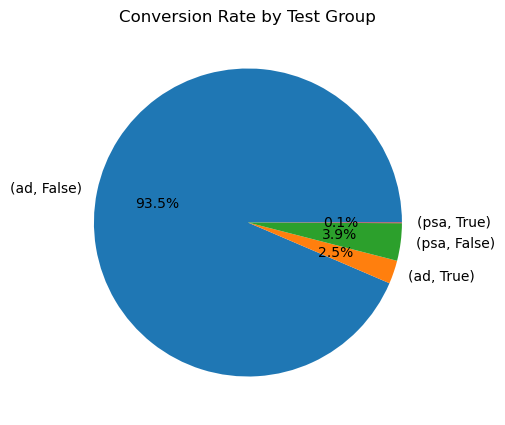

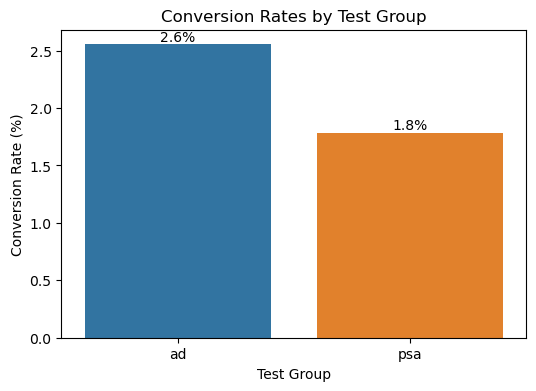

In [58]:
import matplotlib.pyplot as plt

grouped_count = newABdf.groupby('test group')['converted'].value_counts()
grouped_count.plot.pie(figsize = (5, 5), autopct = '%1.1f%%')
plt.title('Conversion Rate by Test Group')
plt.ylabel('')


conversion_rates = newABdf.groupby('test group')['converted'].mean() * 100  # multiply by 100 for percentage

# Step 2: Plot the Conversion Rates
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
ax.set_title('Conversion Rates by Test Group')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Test Group')

# Step 3: Add percentage labels on top of bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


Summary:
Pie chart provides the percentage breakdown of conversions based on the test group. The large majority (93.5%) of users in the "ad" group did not convert, and 3.9% of the "psa" group did not convert. Only small portions of both the ad group (2.5%) and PSA group (0.1%) resulted in conversions.  Even though the overall conversion rates are relatively low but the ads seem to lead to conversions at a slightly higher rate than the PSA group.  The chart suggests that exposure to ads may be more effective in driving conversions than a PSA. This prove  address the first question regarding whether the campaign is successful and to what extent the ads contributed to this success.

Bar chart compares the conversion rates  between users who were shown ads versus those who were shown the PSA. The conversion rate for users shown ads is 2.6% while the conversion rate for the PSA group is 1.8%.

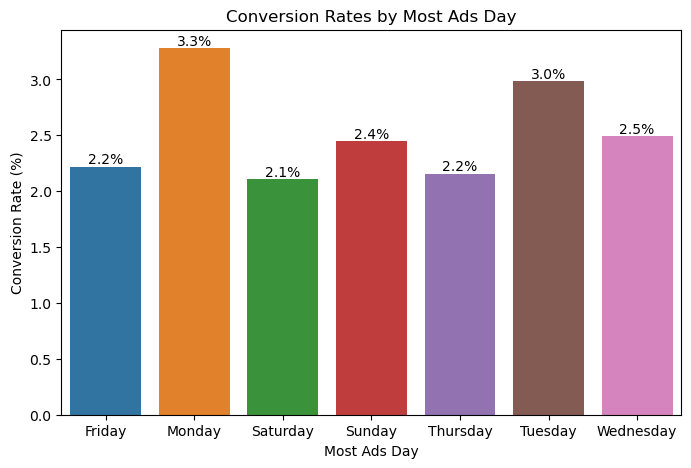

In [59]:
import matplotlib.pyplot as plt


# Step 1: Calculate Conversion Rate by Most Ads Day
conversion_rates_by_day = newABdf.groupby('most ads day')['converted'].mean() * 100  # multiply by 100 for percentage

# Step 2: Plot the Conversion Rates
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=conversion_rates_by_day.index, y=conversion_rates_by_day.values)
ax.set_title('Conversion Rates by Most Ads Day')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Most Ads Day')

# Step 3: Add percentage labels on top of bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


Summary:
 bar chart visualizes the conversion rates (in percentage) for each day of the week based on when users saw the most ads. Based on the result, can view that Monday has the highest conversion rate (3.3%), Tuesday (3.0%), Wednesday(2.5%), Sunday(2.4%), Friday(2.2%) , Thurday (2.2%) and the lowest conversion rate is on Saturday 2.1%. Hence, running fewer ads on weekends and focusing efforts on Monday and Tuesday could maximize results. This is because,  Mondays and Tuesdays had drive the highest conversion rates and shown these days may be optimal for ad targeting and campaign focus. This provides a clear opportunity to refine the timing of ad campaigns to boost overall conversion rates.

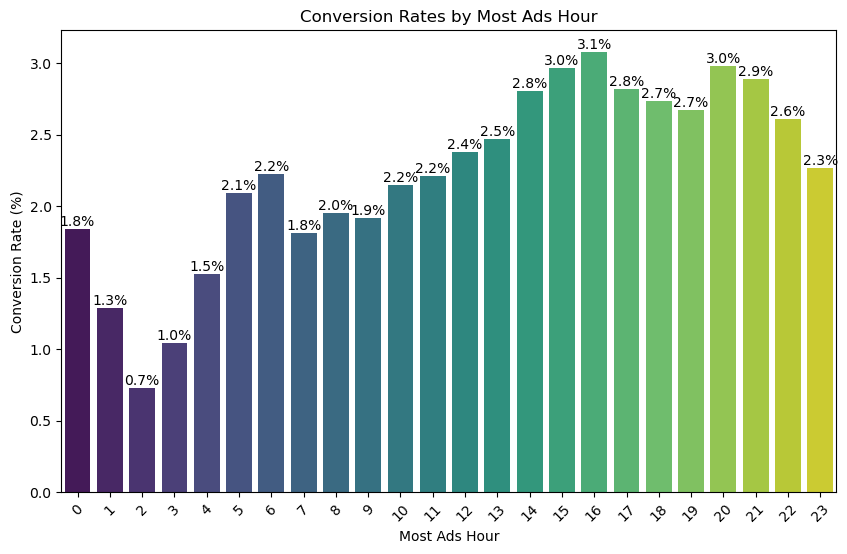

In [60]:
import matplotlib.pyplot as plt


# Step 1: Calculate Conversion Rate by Most Ads Hour
conversion_rates_by_hour = newABdf.groupby('most ads hour')['converted'].mean() * 100  # multiply by 100 for percentage

# Step 2: Plot the Conversion Rates
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conversion_rates_by_hour.index, y=conversion_rates_by_hour.values, palette="viridis")
ax.set_title('Conversion Rates by Most Ads Hour')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Most Ads Hour')

# Step 3: Add percentage labels on top of bars
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
plt.show()


Summary:
bar chart illustrates conversion rates (in percentage) by the hour of the day when users saw the most ads. Based on the result, can view that the highest conversion rates occur between 13:00 and 18:00 with the peak at 15:00 that reached 3.1 and  16:00 that reached 3.0%. The lowest conversion rates are seen in the early morning hours, particularly around 3:00 which is 0.7%. Hence, the afternoon time slot, particularly around 15:00 and 16:00, should be a primary focus for ad campaigns due to the higher conversion rates.  Running ads during low-conversion hours ( midnight to 6:00) might not be cost-effective. Reducing or even pausing ad spend during these hours and reallocating resources to peak hours could improve overall campaign performance.

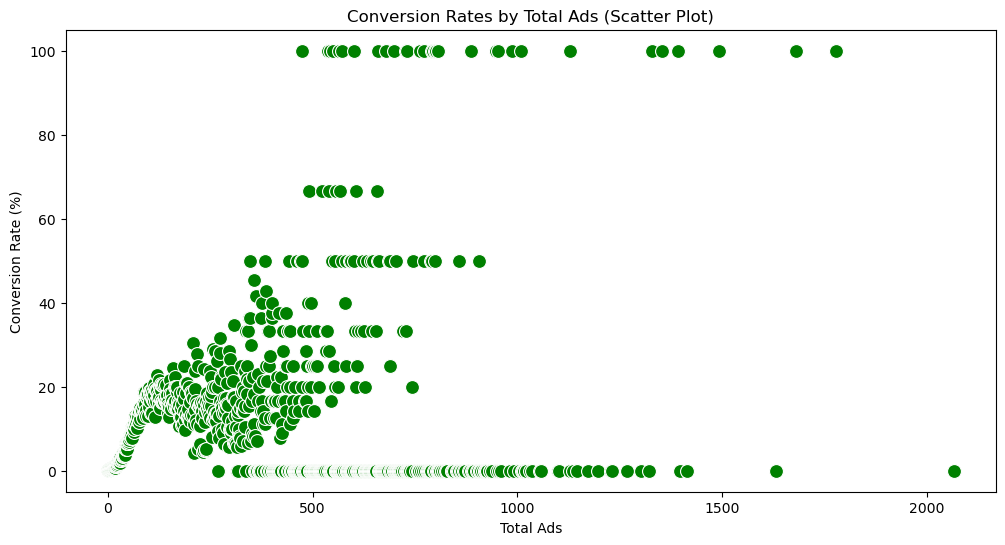

In [61]:
import matplotlib.pyplot as plt


# Step 1: Calculate Conversion Rate by Total Ads (No Binning)
conversion_rates_by_ads = newABdf.groupby('total ads')['converted'].mean() * 100  # multiply by 100 for percentage

# Step 2: Plot the Conversion Rates using a Scatter Plot
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x=conversion_rates_by_ads.index, y=conversion_rates_by_ads.values, color="green", s=100)
ax.set_title('Conversion Rates by Total Ads (Scatter Plot)')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xlabel('Total Ads')

plt.show()


Summary:

This scatter plot demonstrates the relationship between the total number of ads seen by users and their conversion rates. Based on the result, many users have 0% conversion rates, even when exposed to a substantial number of ads. This mean that merely increasing ad exposure does not guarantee conversions. There is no clear linear relationship between the total number of ads and conversion rates. While some users convert at low exposure levels, others may require more ads to convert, and some do not convert regardless of how many ads they see. There are several outliers where users achieve very high conversion rates (100%) with both low and high ad exposures, as seen from clusters at the top of the plot.

Hence, increasing the number of ads doesn't necessarily lead to higher conversion rates and there seems to be diminishing returns after a certain threshold (around 500 ads). Users may become desensitized or frustrated when overexposed to ads, lowering the effectiveness of the campaign.

Eventhough exposure to ads does influence conversion rates, the relationship is complex and non-linear. Many users do not convert even after high levels of exposure, suggesting that targeted ad strategies and optimal frequency are more important than sheer ad volume.

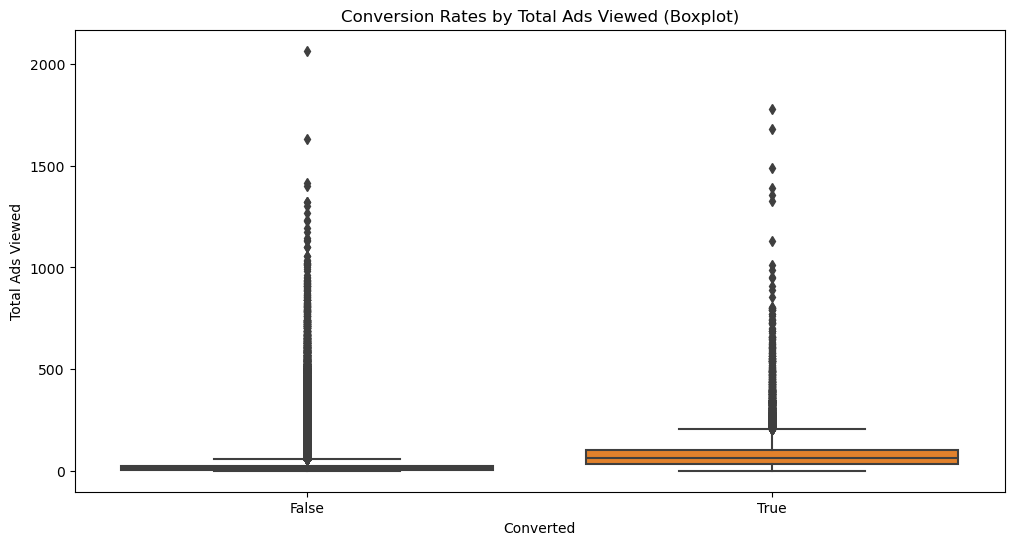

In [62]:

conversion_rates_by_ads = newABdf.groupby('total ads')['converted'].mean() * 100
plt.figure(figsize=(12, 6))
sns.boxplot(data=newABdf, x='converted', y='total ads', )
plt.title('Conversion Rates by Total Ads Viewed (Boxplot)')
plt.xlabel('Converted')
plt.ylabel('Total Ads Viewed')
plt.show()

Statistical Testing

Hypotheses:

Null Hypothesis (H₀): There is no difference in the conversion rates between the 'ad' and 'psa' groups. Any observed difference is due to random chance.
Alternative Hypothesis (H₁): There is a difference in the conversion rates between the 'ad' and 'psa' groups, suggesting that the ad has an effect on conversions.


Given the binary nature of the conversion data (converted vs. not converted),  two potential approaches will be explore :

1.Chi-Square Test of Independence: This test is suitable for categorical data and helps determine whether the distribution of conversion status (converted or not) is independent of the test group (ad or PSA). It assesses whether the differences in conversion rates between the groups are statistically significant.

2.Mann-Whitney U Test: Since the distribution of conversions is likely skewed, the Mann-Whitney U test (also called the Wilcoxon Rank-Sum Test) serves as a non-parametric alternative to the t-test. It compares the ranks of conversions between the 'ad' and 'psa' groups without assuming normality, making it particularly useful given the unequal sample sizes.

In [63]:
# contingency table based on test group
contingencytable= pd.crosstab(newABdf['test group'], newABdf['converted'])
contingencytable

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [64]:
from scipy import stats
import pandas as pd

# Check expected frequencies
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytable)
expected_frequencies_group = pd.DataFrame(ex, index=contingencytable.index, columns=contingencytable.columns)
expected_frequencies_group.round(2).sort_values(by=[True], ascending=False)


converted,False,True
test group,,
ad,550327.72,14249.28
psa,22930.28,593.72


In [66]:
# Perform the Chi-Square Test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytable)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat.round(2)}")
print(f"P-Value: {p_val.round(4)}")
print(f"Degrees of Freedom: {dof}")

# Interpretation of the p-value
alpha = 0.05
if p_val < alpha:
    print("The p-value is less than 0.05, indicating a significant relationship between 'test group' and 'converted'.")
else:
    print("The p-value is greater than 0.05, indicating no significant relationship between 'test group' and 'converted'.")

Chi-Square Statistic: 54.01
P-Value: 0.0
Degrees of Freedom: 1
The p-value is less than 0.05, indicating a significant relationship between 'test group' and 'converted'.


The Chi-Square test show a statistically significant relationship between the test group (ad vs. PSA) and conversion status (converted or not). However, to solve the imbalance in both the test groups (96% in the ad group vs. 4% in the PSA group) and the conversion outcomes (97.5% not converted vs. 2.5% converted), the Mann-Whitney U test will be employed next.

In [67]:
from scipy.stats import mannwhitneyu  # Import the Mann-Whitney U test function
import pandas as pd

# Separate the data into two groups: ad and psa
ad_group = newABdf[newABdf['test group'] == 'ad']['converted']
psa_group = newABdf[newABdf['test group'] == 'psa']['converted']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(ad_group, psa_group)

print(f"Mann-Whitney U Statistic: {stat.round(2)}")
print(f"P-Value: {p_value.round(4)}")


Mann-Whitney U Statistic: 6691636830.0
P-Value: 0.0


The Mann-Whitney U test show  statistically significant difference between the conversion rates of the 'ad' and 'psa' groups. This supports the idea that the ads themselves potentially contribute to the success of the campaign, indicating that ad exposure can play a role in driving conversions more effectively than the PSA.

Identifying Optimal Campaign Timing: Day of the Week Analysis
In this section,  the relationship between the day of the week when users viewed the most ads and their likelihood of converting will be analysis. This can help to  understand whether certain days are associated with higher conversion rates can help optimize the timing of ad campaigns.

The reason is to know are users more likely to convert on certain days of the week compared to others?
To explore whether users are more likely to convert on certain days, Chi-Square test of independence to assess whether there is a significant relationship between these two categorical variables:

most ads day: The day of the week when users viewed the most ads.
converted: Whether or not the user converted (True or False).

In [68]:
# contingency table based on day
contingencytableday = pd.crosstab(newABdf['most ads day'], newABdf['converted'])
contingencytableday.sort_values(by=[True], ascending=False)

converted,False,True
most ads day,,
Monday,84216,2857
Tuesday,75167,2312
Sunday,83301,2090
Friday,90551,2057
Wednesday,78890,2018
Thursday,81192,1790
Saturday,79941,1719


In [69]:
# Check expected frequencies
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytableday)
expected_frequencies_day = pd.DataFrame(ex, index=contingencytableday.index, columns=contingencytableday.columns)
expected_frequencies_day.round(2).sort_values(by=[True], ascending=False)

converted,False,True
most ads day,,
Friday,90270.68,2337.32
Monday,84875.38,2197.62
Sunday,83235.83,2155.17
Thursday,80887.63,2094.37
Saturday,79598.99,2061.01
Wednesday,78865.97,2042.03
Tuesday,75523.52,1955.48


In [70]:
# Perform the Chi-Square Test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytableday)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat.round(2)}")
print(f"P-Value: {p_val.round(4)}")
print(f"Degrees of Freedom: {dof}")

# Interpretation of the p-value
alpha = 0.05
if p_val < alpha:
    print("The p-value is less than 0.05, indicating a significant relationship between 'most ads day' and 'converted'.")
else:
    print("The p-value is greater than 0.05, indicating no significant relationship between 'most ads day' and 'converted'.")

Chi-Square Statistic: 410.05
P-Value: 0.0
Degrees of Freedom: 6
The p-value is less than 0.05, indicating a significant relationship between 'most ads day' and 'converted'.


Summary:
There is a statistically significant relationship between most ads day and converted. This mean that the day of the week when users viewed the most ads does influence the likelihood of conversion.

However, this analysis alone does not show which day are the most effective for running campaigns. 

converted     False  True 
most ads day              
Friday        90551   2057
Monday        84216   2857
Saturday      79941   1719
Sunday        83301   2090
Thursday      81192   1790
Tuesday       75167   2312
Wednesday     78890   2018


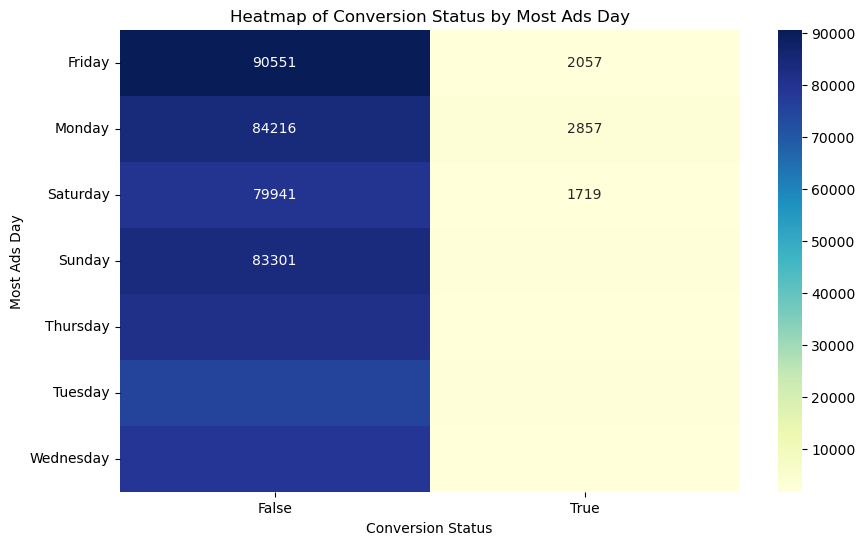

In [71]:
# Visualize the contingency table with a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
print(contingencytableday)  # Verify if all days are included

plt.figure(figsize=(10, 6))
sns.heatmap(contingencytableday, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Conversion Status by Most Ads Day')
plt.xlabel('Conversion Status')
plt.ylabel('Most Ads Day')
plt.show()

In [72]:
# Calculate conversion rates for each day
conversion_rates_day = contingencytableday.div(contingencytableday.sum(axis=1), axis=0) * 100

# Display conversion rates
print("Conversion Rates by Day:")
print(conversion_rates_day[True].round(2).sort_values(ascending=False))

Conversion Rates by Day:
most ads day
Monday       3.28
Tuesday      2.98
Wednesday    2.49
Sunday       2.45
Friday       2.22
Thursday     2.16
Saturday     2.11
Name: True, dtype: float64


The heatmap and the Conversion Rates by Day table show that Monday has the highest conversion rate at 3.28%, which is notably higher than the other days. This mean that Monday could be an optimal day for running ad campaigns to maximize conversions.



In [73]:
# Statistical comparison between Monday and other days
days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days:
    comparison_table_day = contingencytableday.loc[['Monday', day]]
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(comparison_table_day)
    print(f"Comparison between Monday and {day}:")
    print(f"Chi-Square Statistic: {chi2_stat.round(2)}, P-Value: {p_val.round(4)}\n")

Comparison between Monday and Tuesday:
Chi-Square Statistic: 11.8, P-Value: 0.0006

Comparison between Monday and Wednesday:
Chi-Square Statistic: 91.89, P-Value: 0.0

Comparison between Monday and Thursday:
Chi-Square Statistic: 201.56, P-Value: 0.0

Comparison between Monday and Friday:
Chi-Square Statistic: 189.15, P-Value: 0.0

Comparison between Monday and Saturday:
Chi-Square Statistic: 220.47, P-Value: 0.0

Comparison between Monday and Sunday:
Chi-Square Statistic: 107.22, P-Value: 0.0



In [74]:
# Set the alpha value for Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / len(days)
print(f"Bonferroni-corrected significance level: {np.round(bonferroni_alpha, 4)}")

Bonferroni-corrected significance level: 0.0083


The Chi-Square statistic represents the magnitude of the difference between observed and expected values for each comparison. A larger Chi-Square value indicates a larger deviation from the expected distribution.The P-value indicates the probability that the observed differences between Monday and other days occurred by chance. A small p-value (commonly less than 0.05) suggests that the difference is statistically significant, meaning the conversion rates between Monday and that day are likely different. Before applying any corrections, all comparisons between Monday and other days yield p-values below 0.05, meaning all are statistically significant. This suggests that Monday's conversion rates are significantly different from all other days.

Bonferroni Correction:
To control forrisk of obtaining a statistically significant result by chance increases, Bonferroni correction had been applied to adjust the significance threshold to account for multiple tests.:

Even after applying the Bonferroni correction, all comparisons remain statistically significant, indicating that Monday’s conversion rates are significantly different from the other days of the week. The results suggest that Monday has distinct conversion patterns compared to other days, which could be due to specific factors such as user behavior, 

Summary:

Monday is statistically significantly better for conversions compared to every other day of the week. This strongly suggests that focusing ad campaigns on Monday could maximize conversions.
Given that Monday consistently outperforms other days, the marketing team should prioritize ad campaigns on Mondays. This could involve concentrating a larger portion of ad budget on this day to leverage the higher conversion rate.
Additionally, it could be beneficial to analyze the specific ad content and timing used on Mondays to identify successful elements that could be replicated on other days.

In [75]:
# Create a contingency table based on hour
contingencytablehour = pd.crosstab(newABdf['most ads hour'], newABdf['converted'])
contingencytablehour.sort_values(by=[True], ascending=False)

converted,False,True
most ads hour,,
15,43358,1325
14,44367,1281
13,46479,1176
16,36411,1156
12,46171,1127
11,45188,1022
17,34001,987
18,31438,885
21,29109,867


In [76]:
# Check expected frequencies
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytablehour)
expected_frequencies_hour = pd.DataFrame(ex, index=contingencytablehour.index, columns=contingencytablehour.columns)
expected_frequencies_hour.round(2).sort_values(by=[True], ascending=False)

converted,False,True
most ads hour,,
13,46452.24,1202.76
12,46104.25,1193.75
11,45043.71,1166.29
14,44495.90,1152.10
15,43555.25,1127.75
10,37956.22,982.78
16,36618.85,948.15
17,34104.94,883.06
18,31507.20,815.80


In [77]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytablehour)
expected_frequencies_hour = pd.DataFrame(ex, index=contingencytablehour.index, columns=contingencytablehour.columns)
expected_frequencies_hour.round(2).sort_values(by=[True], ascending=False)

converted,False,True
most ads hour,,
13,46452.24,1202.76
12,46104.25,1193.75
11,45043.71,1166.29
14,44495.90,1152.10
15,43555.25,1127.75
10,37956.22,982.78
16,36618.85,948.15
17,34104.94,883.06
18,31507.20,815.80


In [78]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingencytablehour)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat.round(2)}")
print(f"P-Value: {p_val.round(4)}")
print(f"Degrees of Freedom: {dof}")

# Interpretation of the p-value
alpha = 0.05
if p_val < alpha:
    print("The p-value is less than 0.05, indicating a significant relationship between 'most ads hour' and 'converted'.")
else:
    print("The p-value is greater than 0.05, indicating no significant relationship between 'most ads hour' and 'converted'.")

Chi-Square Statistic: 430.77
P-Value: 0.0
Degrees of Freedom: 23
The p-value is less than 0.05, indicating a significant relationship between 'most ads hour' and 'converted'.


Summary:
There is a statistically significant relationship between most ads hour and converted. This suggests that the hour of the day when users viewed the most ads does influence the likelihood of conversion.

Eventhough the significant relationship had been established, still need to identify which specific hours are the most effective for running campaigns. 


converted      False  True 
most ads hour              
0               5434    102
1               4740     62
2               5294     39
3               2651     28
4                711     11
5                749     16
6               2022     46
7               6289    116
8              17283    344
9              30409    595
10             38101    838
11             45188   1022
12             46171   1127
13             46479   1176
14             44367   1281
15             43358   1325
16             36411   1156
17             34001    987
18             31438    885
19             29541    811
20             28061    862
21             29109    867
22             25742    690
23             19709    457


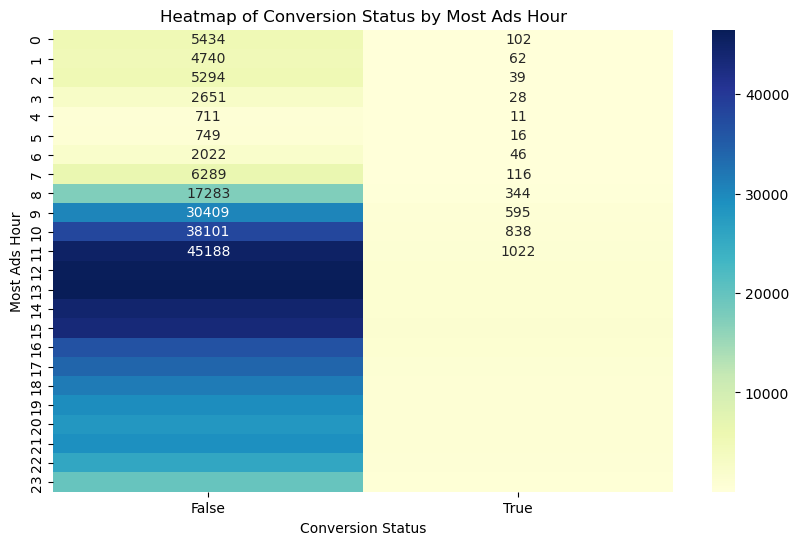

In [79]:
# Visualize the contingency table with a heatmap
print(contingencytablehour) 
plt.figure(figsize=(10, 6))
sns.heatmap(contingencytablehour, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Conversion Status by Most Ads Hour')
plt.xlabel('Conversion Status')
plt.ylabel('Most Ads Hour')
plt.show()

The result of heatmap suggest that the peak hours for conversions are during the workday, particularly between 10 AM and 3 PM, while off-peak hours (late night and early morning) have lower conversion activity. Based on the heatmap, the office hours between 9 AM and 5 PM are associated with more conversions, which could be due to higher user activity during the workday. These hours have consistently higher conversion rates, as indicated by higher values in the "True" column. Midnight to 6 AM shows very few conversions. This might indicate that ads shown during these hours are less effective, or that there are simply fewer users online to convert.


In [80]:
conversion_rates_hour = contingencytablehour.div(contingencytablehour.sum(axis=1), axis=0) * 100

# Display conversion rates
print("Conversion Rates by Hour:")
print(conversion_rates_hour[True].sort_values(ascending=False))

Conversion Rates by Hour:
most ads hour
16    3.077169
20    2.980327
15    2.965334
21    2.892314
17    2.820967
14    2.806257
18    2.737988
19    2.671982
22    2.610472
13    2.467737
12    2.382765
23    2.266191
6     2.224371
11    2.211643
10    2.152084
5     2.091503
8     1.951552
9     1.919107
0     1.842486
7     1.811085
4     1.523546
1     1.291129
3     1.045166
2     0.731296
Name: True, dtype: float64


In [81]:
high_conversion_hours = conversion_rates_hour[True][conversion_rates_hour[True] > 2.5]
hours_to_compare = high_conversion_hours.index.tolist()

# Calculate the number of comparisons and Bonferroni-corrected significance level
alpha = 0.05
number_of_comparisons = len(hours_to_compare) * (len(hours_to_compare) - 1) / 2
bonferroni_alpha = alpha / number_of_comparisons
print(np.round(bonferroni_alpha, 4))

0.0014


In [82]:
# Perform pairwise comparisons and automatically compare against Bonferroni correction
significant_results = []

for i in range(len(hours_to_compare)):
    for j in range(i + 1, len(hours_to_compare)):
        hour1 = hours_to_compare[i]
        hour2 = hours_to_compare[j]
        comparison_table = contingencytablehour.loc[[hour1, hour2]]
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(comparison_table)
        
        # Check if the p-value is below the Bonferroni-corrected significance level
        print(f"Comparison between {hour1}:00 and {hour2}:00:")
        print(f"Chi-Square Statistic: {chi2_stat.round(2)}, P-Value: {p_val.round(2)}")
        if p_val < bonferroni_alpha:
            print("Result: Statistically significant after Bonferroni correction.\n")
        else:
            print("Result: Not statistically significant after Bonferroni correction.\n")

Comparison between 14:00 and 15:00:
Chi-Square Statistic: 1.98, P-Value: 0.16
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 16:00:
Chi-Square Statistic: 5.23, P-Value: 0.02
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 17:00:
Chi-Square Statistic: 0.01, P-Value: 0.92
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 18:00:
Chi-Square Statistic: 0.3, P-Value: 0.58
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 19:00:
Chi-Square Statistic: 1.18, P-Value: 0.28
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 20:00:
Chi-Square Statistic: 1.86, P-Value: 0.17
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 21:00:
Chi-Square Statistic: 0.45, P-Value: 0.5
Result: Not statistically significant after Bonf

Summary:
Most of the hour-to-hour comparisons do not show statistically significant differences in conversion rates after applying the Bonferroni correction. Only a few comparisons which is 16:00 and 22:00 were found to be statistically significant.  The pairwise comparison analysis confirms that 16:00 is a particularly strong hour for conversions, especially when compared to later hours like 22:00. This time should be prioritized when scheduling ad campaigns.
While 16:00 stands out, the lack of significant differences between many of the other high-conversion hours (e.g., 15:00, 17:00, 20:00) suggests that ads can be effectively run during these times without worrying about large differences in conversion performance. 

Finding the Best Day and Times for Marketing
Since the 16:00 is the best hour overall and Monday is the best day, the step is  to explore the interaction between most ads day and most ads hour to determine whether 16:00 on Monday is truly the optimal time for campaigns or if other times on Monday or specific times on other days might be better.

In [83]:
# Create a new column combining `most ads day` and `most ads hour`
newABdf['day_hour'] = newABdf['most ads day'] + '_' + newABdf['most ads hour'].astype(str)

# Create a contingency table for day-hour combinations vs. Conversion Rate
contingency_table_day_hour = pd.crosstab(newABdf['day_hour'], newABdf['converted'])
print(contingency_table_day_hour)

converted    False  True 
day_hour                 
Friday_0       825     16
Friday_1       684      7
Friday_10     5447    129
Friday_11     7154    129
Friday_12     7178    141
...            ...    ...
Wednesday_5    142      1
Wednesday_6    360      5
Wednesday_7    847     10
Wednesday_8   2313     38
Wednesday_9   4699     80

[168 rows x 2 columns]


In [84]:
# Perform the Chi-Square Test
chi2_stat_day_hour, p_val_day_hour, dof_day_hour, ex_day_hour = stats.chi2_contingency(contingency_table_day_hour)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat.round(2)}")
print(f"P-Value: {p_val.round(4)}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 4.05
P-Value: 0.0441
Degrees of Freedom: 1


The p-value is less than 0.05, indicating a statistically significant relationship between the day-hour combinations and the conversion rate.

In [85]:
# Calculate conversion rates for each day-hour combination
conversion_rates_day_hour = contingency_table_day_hour.div(contingency_table_day_hour.sum(axis=1), axis=0) * 100

# Sort and display the conversion rates
conversion_rates_day_hour_sorted = conversion_rates_day_hour[True].sort_values(ascending=False)
print('Top 20 Day-Hour Combinations by Conversion Rate (%):')
print(conversion_rates_day_hour_sorted.head(20)) 

Top 20 Day-Hour Combinations by Conversion Rate (%):
day_hour
Saturday_5      5.319149
Saturday_6      4.905660
Tuesday_16      4.528390
Monday_14       4.435675
Sunday_20       4.316547
Monday_15       4.248953
Tuesday_15      4.036104
Monday_6        3.942652
Monday_16       3.704336
Sunday_21       3.618849
Tuesday_18      3.608661
Wednesday_16    3.580298
Monday_17       3.573333
Sunday_19       3.557733
Tuesday_14      3.520701
Tuesday_17      3.416588
Monday_13       3.414634
Tuesday_22      3.360117
Monday_12       3.299057
Monday_21       3.293209
Name: True, dtype: float64


Saturday, 5 AM has the highest conversion rate of 5.32%, followed closely by Saturday, 6 AM with a conversion rate of 4.91%. Tuesday, 16:00 (4 PM) and Monday, 14:00 (2 PM) also exhibit relatively high conversion rates of 4.53% and 4.44%.
The top day-hour combinations by conversion rate reveal interesting and actionable insights. Particularly high-performing periods, such as Saturday early mornings, Monday and Tuesday afternoons, and Sunday evenings, should be further investigated and targeted. However, the anomalous nature of some of these findings (e.g., Saturday morning) suggests the need for further research to uncover the driving factors behind these high conversion rates.

In [86]:
# Extract the top-performing day-hour combinations
top_combinations = conversion_rates_day_hour_sorted[conversion_rates_day_hour[True] > 3.6].index.tolist()

# Prepare a list of tuples for each pairwise comparison
pairs_to_compare = [(top_combinations[i], top_combinations[j]) 
                    for i in range(len(top_combinations)) 
                    for j in range(i + 1, len(top_combinations))]

# Initialize a list to store results
pairwise_results = []

In [87]:
# Perform pairwise comparisons
for pair in pairs_to_compare:
    day_hour1, day_hour2 = pair
    comparison_table = contingency_table_day_hour.loc[[day_hour1, day_hour2]]
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(comparison_table)
    pairwise_results.append((day_hour1, day_hour2, chi2_stat, p_val))

# Convert results to a DataFrame for easier viewing
pairwise_results_df = pd.DataFrame(pairwise_results, 
                                   columns=['Day_Hour_1', 'Day_Hour_2', 'Chi2_Stat', 'P_Value'])

# Calculate the Bonferroni-corrected significance level
alpha = 0.05
bonferroni_alpha = alpha / len(pairs_to_compare)

# Add a column to indicate whether the result is significant after Bonferroni correction
pairwise_results_df['Significant'] = pairwise_results_df['P_Value'] < bonferroni_alpha

# Display significant results
significant_pairwise_results = pairwise_results_df[pairwise_results_df['Significant']]
print(significant_pairwise_results)

Empty DataFrame
Columns: [Day_Hour_1, Day_Hour_2, Chi2_Stat, P_Value, Significant]
Index: []


In [88]:
# Calculate conversion rates for each day-hour combination
conversion_rates_by_day_hour = newABdf.groupby(['most ads day', 'most ads hour']).agg({'converted': 'mean'}).unstack()

# Define the correct order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame to ensure the correct order
conversion_rates_by_day_hour = conversion_rates_by_day_hour.reindex(day_order)

# Multiply by 100 to get percentages
conversion_rates_by_day_hour = conversion_rates_by_day_hour * 100
conversion_rates_by_day_hour.style.background_gradient(cmap='coolwarm').format('{:.2f}')

In [89]:
# Identify top-performing hours for each day
top_hours_by_day = conversion_rates_by_day_hour.idxmax(axis=1)
top_conversion_rates_by_day = conversion_rates_by_day_hour.max(axis=1)

# Combine into a DataFrame for easy viewing
top_hours_df = pd.DataFrame({
    'Top Hour': top_hours_by_day,
    'Top Conversion Rate (%)': top_conversion_rates_by_day
})

print(top_hours_df)

                     Top Hour  Top Conversion Rate (%)
most ads day                                          
Monday        (converted, 14)                 4.435675
Tuesday       (converted, 16)                 4.528390
Wednesday     (converted, 16)                 3.580298
Thursday      (converted, 20)                 2.814778
Friday        (converted, 20)                 2.979556
Saturday       (converted, 5)                 5.319149
Sunday        (converted, 20)                 4.316547


Summary:
Monday to Wednesday: The late afternoon (14:00 to 16:00) consistently emerges as the best time for ad campaigns early in the week. This suggests that users are more engaged and likely to convert during these hours.
Thursday and Friday: As the week progresses, focus shifts to the evening, particularly around 20:00. Users are likely winding down and more receptive to ads during this time.
Saturday: Early morning (05:00) is surprisingly effective, suggesting a unique user behavior pattern that can be leveraged for specific types of campaigns.
Sunday: Similar to the end of the workweek, Sunday evening (20:00) is optimal for driving conversions. This is likely as users prepare for the upcoming week, making them more responsive to ads.

Analyzing Ad Exposure Levels and Conversion Success
In this section,  the relationship between the total number of ads viewed by users and their likelihood of converting (making a purchase) will be analysis. Understanding whether there is a connection between the number of ads a user is exposed to and their conversion behavior can provide valuable insights into optimizing ad exposure for maximum effectiveness.

Main objective
-Does viewing more ads increase the likelihood of a user converting?
-Is there an optimal number of ads that maximizes conversion rates?


In [91]:
# Descriptive statistics for converters
total_ads_converted_stats = newABdf[newABdf['converted'] == True]['total ads'].describe()

# Descriptive statistics for non-converters
total_ads_not_converted_stats = newABdf[newABdf['converted'] == False]['total ads'].describe()

# Display the results
print("\nDescriptive Statistics for Converters:")
print(total_ads_converted_stats.round(2))
print("\nDescriptive Statistics for Non-Converters:")
print(total_ads_not_converted_stats.round(2))


Descriptive Statistics for Converters:
count    14843.00
mean        83.89
std         87.46
min          1.00
25%         35.00
50%         64.00
75%        103.00
max       1778.00
Name: total ads, dtype: float64

Descriptive Statistics for Non-Converters:
count    573258.00
mean         23.29
std          40.86
min           1.00
25%           4.00
50%          13.00
75%          26.00
max        2065.00
Name: total ads, dtype: float64


Summary:
1.Converters
 Users who converted were exposed to an average of 83.89 ads, with a median of 64 ads. The wide standard deviation (87.46) and the fact that the 75th percentile is 103 ads indicate that converters are generally exposed to a significantly higher number of ads.

2.Non-Converters
 In contrast, users who did not convert were exposed to an average of only 23.29 ads, with a median of 13 ads. The 75th percentile is only 26 ads, which is significantly lower than that for converters, indicating that non-converters generally see far fewer ads.

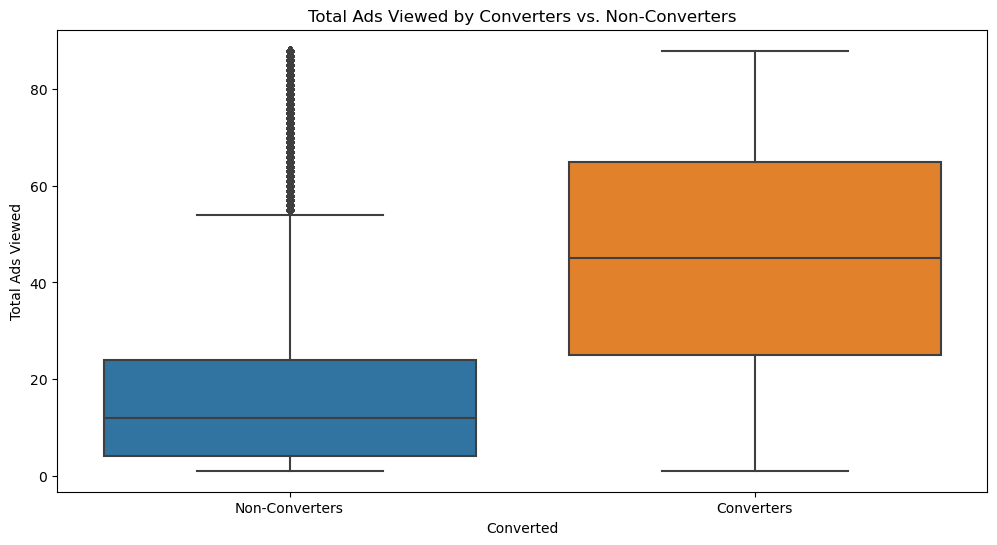

In [92]:
# Create a box plot for 'total ads' viewed by converters and non-converters
plt.figure(figsize=(12, 6))

# Calculate the 95th percentile to filter extreme outliers
percentile_95 = newABdf['total ads'].quantile(0.95)

# Filter the data to include only values below the 95th percentile
filtered_data = newABdf[newABdf['total ads'] <= percentile_95]

# Side-by-side box plots
sns.boxplot(x='converted', y='total ads', data=filtered_data)

# Set titles and labels
plt.title('Total Ads Viewed by Converters vs. Non-Converters')
plt.xlabel('Converted')
plt.ylabel('Total Ads Viewed')
plt.xticks([0, 1], ['Non-Converters', 'Converters'])

# Show the plot
plt.show()



1. Non-Converters
The median  is lower compared to the converters. It appears that non-converters tend to view fewer ads overall. The interquartile range  is also relatively narrow, indicating less variability in the number of ads viewed by non-converters. The whiskers extend to about 60 ads, with several outliers shown as individual dots beyond the whiskers. These outliers represent users who viewed significantly more ads but did not convert.

2. Converters
The median ad views for converters is higher than for non-converters  and suggest that users who convert tend to view more ads before making a decision. The IQR is wider than that of non-converters, indicating more variability in the number of ads viewed among converters. There are no visible outliers, which suggests that converters typically stay within the range of expected ad views, even for those who view a large number of ads.
 
It is clear from the plot that converters tend to view more ads than non-converters. This suggests that higher engagement may lead to higher conversion rates. This finding could be indicative of the need for users to interact with more content before they feel confident enough to convert. Hence, increase opportunities for users to engage with ads whether through retargeting strategies or presenting relevant ads at different stages of the user journey.

3. Non-Converters and Ad Saturation
- For non-converters, the presence of many outliers  who have viewed over 60 ads suggests that there may be a segment of users who see too many ads but still do not convert. This could be due to ad fatigue, where users are shown too many ads without sufficient variety or relevance, leading to a decline in engagement or even annoyance. Hence, need to consider implementing frequency capping to prevent users from seeing the same ads too many times. Additionally, improving ad relevance and personalization could reduce the chances of users becoming overwhelmed without converting.

4. Outliers in Non-Converters
The outliers for non-converters represent users who viewed significantly more ads (beyond 60) but did not convert. This group is important because it indicates that there is a threshold beyond which showing additional ads does not lead to conversions.

In [94]:
# Mann-Whitney U Test
stat, p_value = mannwhitneyu(newABdf['total ads'][newABdf['converted'] == True],
                             newABdf['total ads'][newABdf['converted'] == False])
print('Mann-Whitney U Test: p-value =', p_value)

Mann-Whitney U Test: p-value = 0.0


The p-value of 0.0 means that the difference between the two groups is statistically significant at any conventional significance level (0.05 or 0.01). This suggests that the number of ads viewed is meaningfully different between users who convert and those who do not. Given the statistical significance, it suggests that ad exposure plays a significant role in influencing conversion rates. Users who convert tend to view more ads than those who don't.



In [95]:
# Determine the maximum value of 'total ads'
max_ads = newABdf['total ads'].max()

# Define bins for segmenting the users based on the number of ads viewed
bin_size = 250
bins = np.arange(0, max_ads + bin_size, bin_size)  # Bins from 0 to max_ads with equal bin size
labels = [f'{i}-{i+bin_size-1}' for i in range(0, int(max_ads), bin_size)]

# Segment users based on the number of ads viewed
newABdf['ad_exposure_group'] = pd.cut(newABdf['total ads'], bins=bins, labels=labels, right=False)

# Calculate the conversion rate for each ad exposure group
conversion_rate_by_group = newABdf.groupby('ad_exposure_group')['converted'].mean() * 100

# Count the number of users in each group for context
user_count_by_group = newABdf.groupby('ad_exposure_group')['converted'].count()

C:\Users\User\AppData\Local\Temp\ipykernel_34528\887007198.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_by_group = newABdf.groupby('ad_exposure_group')['converted'].mean() * 100
C:\Users\User\AppData\Local\Temp\ipykernel_34528\887007198.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_count_by_group = newABdf.groupby('ad_exposure_group')['converted'].count()


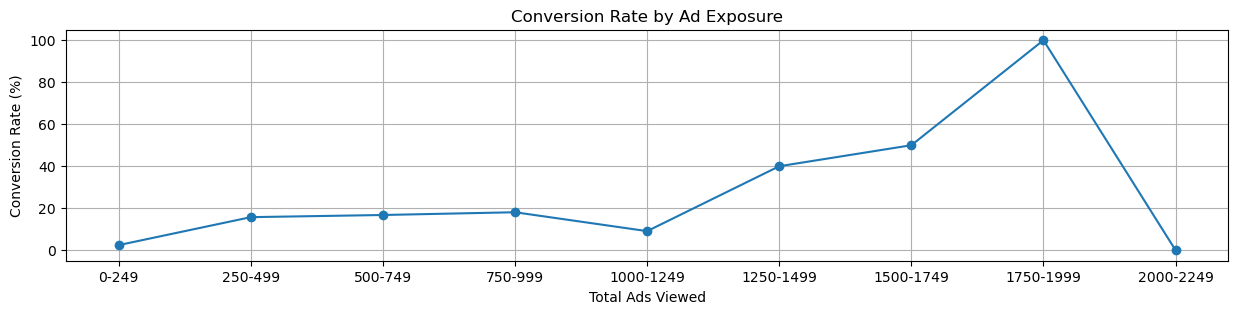

In [96]:
# Plot the conversion rates against the number of ads viewed
plt.figure(figsize=(15, 3))
plt.plot(conversion_rate_by_group.index, conversion_rate_by_group.values, marker='o')
plt.title('Conversion Rate by Ad Exposure')
plt.xlabel('Total Ads Viewed')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

In [97]:
conversion_user_by_ad_exposure = pd.concat([conversion_rate_by_group, user_count_by_group], axis=1).round(2)
conversion_user_by_ad_exposure.columns = ['Conversion Rate (%)', 'User Count']
conversion_user_by_ad_exposure

,Conversion Rate (%),User Count
ad_exposure_group,,
0-249,2.44,584464
250-499,15.75,3048
500-749,16.78,459
750-999,18.09,94
1000-1249,9.09,22
1250-1499,40.00,10
1500-1749,50.00,2
1750-1999,100.00,1
2000-2249,0.00,1


Summary:
1.Conversion rates increase from 2.44% for 0-249 ads to 18.09% for 750-999 ads, indicating that higher ad exposure generally correlates with higher conversion rates up to this point.
2.Beyond 1000 ads, there is a slight drop in the conversion rate (9.09% for the 1000-1249 ads group), followed by a sharp rise in conversion rates for the higher ad exposure groups, such as 40.00% for 1250-1499 ads and 50.00% for 1500-1749 ads. However, due to the very small number of users in these higher exposure ranges, these results should be interpreted with caution as they are less reliable.

Accounting for Variability in User Segments: Weighted Conversion Rates and Confidence Intervals

When the number of users in each segment varies significantly, it can lead to misleading conclusions if not properly accounted for. Hence, two method will be employed to address this.

1.Calculating weighted average conversion rates for each segment, accounting for different sample sizes.
2.Computing 95% confidence intervals for each segment, which provide a range that likely captures the true conversion rate for that segment.

C:\Users\User\AppData\Local\Temp\ipykernel_34528\3481381744.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confidence_intervals = newABdf.groupby('ad_exposure_group').apply(


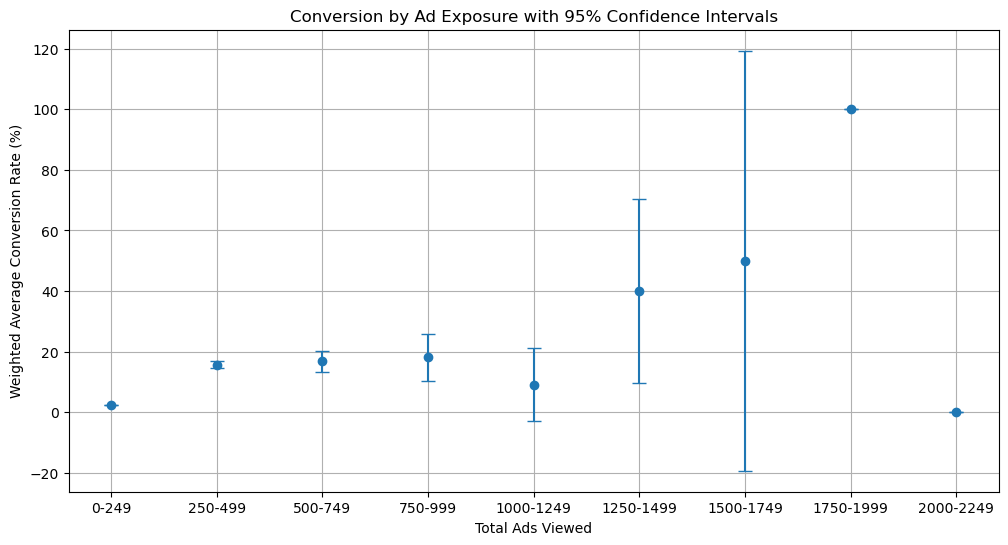

In [101]:
from scipy.stats import norm
# Function to calculate confidence intervals
def calculate_confidence_interval(count, nobs, alpha=0.05):
    proportion = count / nobs
    z = norm.ppf(1 - alpha / 2)
    margin_of_error = z * np.sqrt((proportion * (1 - proportion)) / nobs)
    return proportion * 100, margin_of_error * 100

# Calculate conversion rates and confidence intervals for each segment
confidence_intervals = newABdf.groupby('ad_exposure_group').apply(
    lambda x: calculate_confidence_interval(x['converted'].sum(), x['converted'].count())
)

# Extract conversion rates and confidence intervals
conversion_rates = confidence_intervals.apply(lambda x: x[0])
confidence_margin = confidence_intervals.apply(lambda x: x[1])

# Plot the conversion rates with confidence intervals
plt.figure(figsize=(12, 6))
plt.errorbar(conversion_rates.index, conversion_rates.values, yerr=confidence_margin.values, fmt='o', capsize=5)
plt.title('Conversion by Ad Exposure with 95% Confidence Intervals')
plt.xlabel('Total Ads Viewed')
plt.ylabel('Weighted Average Conversion Rate (%)')
plt.grid(True)
plt.show()

In [102]:
conversion_rates_with_confidence = pd.concat([conversion_rates, confidence_margin], axis=1).round(2)
conversion_rates_with_confidence.columns = ['Conversion Rate', 'Confidence Interval']
conversion_rates_with_confidence

,Conversion Rate,Confidence Interval
ad_exposure_group,,
0-249,2.44,0.04
250-499,15.75,1.29
500-749,16.78,3.42
750-999,18.09,7.78
1000-1249,9.09,12.01
1250-1499,40.00,30.36
1500-1749,50.00,69.30
1750-1999,100.00,0.00
2000-2249,0.00,0.00


Summary:
1.Conversion rates increase significantly from 2.44% in the 0-249 ads group to 18.09% in the 750-999 ads group. This range provides the most reliable data, as indicated by the relatively narrow confidence intervals.
2.In the higher ad exposure groups (beyond 750 ads), while conversion rates continue to rise, there is increased variability with the large confidence intervals. These results are less reliable likely due to the small sample size

Final Summary:
Ad Exposure and Effectiveness

1. ADs vs. PSAs
  Analysis found that traditional advertisements (ADs) outperformed public service announcements (PSAs) in driving purchases. This means that ADs had a much stronger effect on conversions. However, since the majority of users were exposed to ADs rather than PSAs, this imbalance could influence the results, so the findings should be interpreted with some caution.

2. Higher Ad Exposure, Higher Conversions
 Users who saw more ads were generally more likely to convert, suggesting that repeated ad exposure plays a crucial role in prompting purchases.

3. Optimal Ad Exposure Range
 The displaying between 250 and 749 ads to users is the "sweet spot" for encouraging purchases without causing ad fatigue. This optimal range boosts conversions while avoiding overwhelming users.

Optimal Campaign Timing

1. Best Day for Campaigns
 Monday consistently had the highest conversion rates across all analyses, making it the top-performing day for user engagement and conversions. This could be because users start the week feeling refreshed or more motivated.

2. Best Hour for Campaigns
 The strongest hour for conversions was 16:00, though other late afternoon to early evening hours (14:00–20:00) also performed well. This range offers some flexibility for scheduling while maintaining high conversion potential.

3. Day-Hour Insights
While Monday at 16:00 proved especially effective, Saturday at 05:00 also had unexpectedly high conversions. Overall, there was no single day-hour combination that was statistically superior to others, but Monday afternoons are still the most promising.

Addressing Key Question

1. Will the Campaign Be Successful? 
   The findings suggest that the campaign has high potential if strategically planned. By focusing on high-performing days and times and ensuring an optimal ad exposure range, we can likely achieve significant results.

2. How Much Success Is Attributable to Ads?  
   Ads were shown to drive conversions far more effectively than PSAs, especially when well-timed and shown in the right volume. A significant portion of the campaign’s success can thus be attributed to these ads.

Actionable Recommendations

1. Concentrate Ads on Mondays
Allocate a significant portion of the ad budget to Mondays, particularly in the late afternoon. Given Monday’s strong performance, it is the most effective day for reaching users.

2. Prioritize Afternoon and Early Evening Hours
 Focus on running ads from 14:00 to 20:00, with particular emphasis on 16:00. This time range has consistently shown high conversion rates.

3. Optimize Ad Exposure
 Aim to show users between 250 and 749 ads, the optimal range for maximizing conversions without causing fatigue. Carefully monitor users who exceed this range to avoid diminishing returns.

4. Tailor Ads to Each Day’s Optimal Times
 Adjust ad timing based on each day’s unique high-performing hours, ensuring that ads reach users when they are most likely to engage and convert.

Limitations

1. Limited Data Scope
This analysis relied only on the available dataset variables. Factors such as user demographics, ad content quality, and external influences (like seasonality or promotions) were not included, potentially limiting the depth of the insights.

2.Imbalance in AD and PSA Exposure
With far more users seeing ads than PSAs, this imbalance may skew the findings, warranting some caution in interpretation.

3. Assumption of Consistent Behavior
Assumed user behavior and ad effectiveness remained consistent throughout the campaign. However, changes in behavior over time, or variations in ad quality, could introduce unaccounted variability.

4. Variation in User Engagement
 Some users saw significantly more ads than others, which could affect results. While we adjusted for this, it’s essential to be mindful of this variation when drawing conclusions.

Final Thoughts

This study offers valuable insights into the timing and exposure strategies that can help a marketing campaign succeed. Well-timed, optimally spaced ads are likely to play a key role in driving conversions. Additional analysis with more comprehensive data could reveal other influencing factors, enabling even more refined recommendations.